dask.array<array, shape=(856,), dtype=float64, chunksize=(856,), chunktype=numpy.ndarray> first: 0.0690513408736042 last: 0.8914094613952027
['Position', 'Selection', 'Value', 'Velocity', 'VelocityOffset', 'Weight', 'conc_NFWmodel', 'gal_type', 'halo_hostid', 'halo_id', 'halo_mvir', 'halo_num_centrals', 'halo_num_satellites', 'halo_rvir', 'halo_upid', 'halo_vx', 'halo_vy', 'halo_vz', 'halo_x', 'halo_y', 'halo_z', 'host_centric_distance', 'vx', 'vy', 'vz', 'x', 'y', 'z']
[[0.0726572  1.07095164 1.07095164]
 [0.5781586  0.66550476 0.66550476]
 [1.12904563 0.83108509 0.83108509]
 ...
 [0.73445295 0.20343539 0.20343539]
 [0.83611507 0.17041869 0.17041869]
 [0.90362011 0.25073092 0.25073092]]


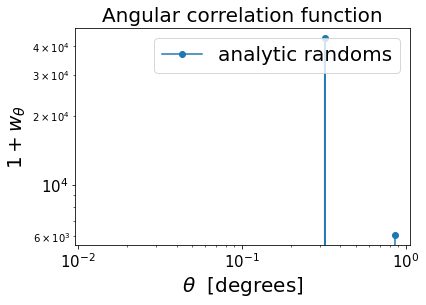

In [35]:
#this is mainly just for testing since it is quick to run and similar to lognormal_sim.ipynb

from mpl_toolkits import mplot3d
from nbodykit.lab import *
from halotools.mock_observables import mock_survey
from astropy.coordinates import cartesian_to_spherical
from halotools.mock_observables import angular_tpcf

import matplotlib.pyplot as plt
import numpy as np
rdshft = 0.0
catalog = UniformCatalog(nbar=100, BoxSize=1.0, seed=42)
catalog['Mass'] = 10**(catalog.rng.uniform(12,15))
halos = HaloCatalog(catalog, cosmo=cosmology.Planck15, redshift=rdshft, mdef='vir', position='Position', velocity='Velocity', mass='Mass')
halos = HaloCatalog(catalog, cosmo=cosmology.Planck15, redshift=rdshft, mdef='vir', position='Position', velocity='Velocity', mass='Mass')
halocat = halos.to_halotools()
hod = halos.populate(Zheng07Model,seed=42)
###################--Trying to Plot--###################
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
zdata = hod['z']
print(zdata)
#ax.scatter(hod['x'],hod['y'],hod['z'])
print (hod.columns)


x = hod.compute(hod['x'])
y = hod.compute(hod['y'])
z = hod.compute(hod['z'])

vx = hod.compute(hod['vx'])
vy = hod.compute(hod['vy'])
vz = hod.compute(hod['vz'])

coords = np.vstack((x,y,z)).T
velocities = np.vstack((vx,vy,vz)).T

sphere_coords = cartesian_to_spherical(x,y,z)
theta_bins = np.logspace(-2,0,15)
w_theta = angular_tpcf(sphere_coords, theta_bins, num_threads='max')
cen_theta_bins = (theta_bins[:-1]+theta_bins[1:])/2.0

plt.plot(cen_theta_bins,1.0+w_theta,'o-', label='analytic randoms')
plt.loglog()
plt.ylabel(r'$1+w_{\theta}$', fontsize=20)
plt.xlabel(r'$\theta$  $[{\rm degrees}]$', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Angular correlation function', fontsize=20)
plt.legend(loc='best', fontsize=20)
theta = sphere_coords[1:]
phi = sphere_coords[2:]
angular = np.vstack((theta,phi)).T
print(angular)
###################